In [1]:
from __future__ import print_function
__author__= 'lk1854@nyu.edu'
import os
import json

import pylab as pl
import numpy as np
from scipy.optimize import curve_fit, minimize

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
distributions = ['Chi-sq', 'Poisson', 'Gaussian', 'Binomial', 'Rayleigh', 'Logistic']

In [3]:
mymean = 100
means = {}
md={}

In [4]:
mysize = np.random.randint(10,2000,100)
mysize

array([1113, 1809, 1523,  725, 1452, 1055,   18,  585,  694, 1590,  153,
       1052, 1114, 1229, 1091,  999, 1265, 1786, 1745, 1215, 1234,  232,
        448,  284, 1606, 1514,  765, 1715, 1666,  941, 1653, 1562,  516,
        727,  232,  700, 1924, 1419, 1855, 1905, 1831, 1779,  573,  710,
       1318,  477,  354, 1268, 1254, 1535,  872,  144,   52, 1130,   75,
        893, 1955,  705, 1389, 1364, 1120, 1689,  830,  282, 1640, 1187,
       1849,  263,  313,  808,   59, 1768, 1560, 1573,  331, 1261,  121,
       1753,  565, 1037,  199, 1865,  922, 1831,  152, 1380,  133, 1419,
       1705,  996, 1368, 1978, 1744, 1738,  467,  107, 1239, 1757, 1339,
        873])

In [5]:
for d in distributions:
    md[d] = {}   
    means[d] = {}

# Distributions

In [6]:
for n in mysize:
    #Chi-sq
    md['Chi-sq'][n] = np.random.chisquare(mymean, size=n)
    #Poisson
    md['Poisson'][n] = np.random.poisson(mymean, size=n)
    #Normal/Gaussian 
    md['Gaussian'][n] = np.random.normal(mymean, 10, size=n)
    #Binomial 
    md['Binomial'][n] = np.random.binomial(mymean*2, 0.5, size=n)
    #Rayleigh
    md['Rayleigh'][n] = np.random.rayleigh(mymean/(sqrt(np.pi/2)), size=n)
    #Logistic scale = 1
    md['Logistic'][n] = np.random.logistic(mymean, 1, size=n)

In [7]:
for d in distributions:
    for nn in md[d].iterkeys():
        means[d][nn] = md[d][nn].mean()

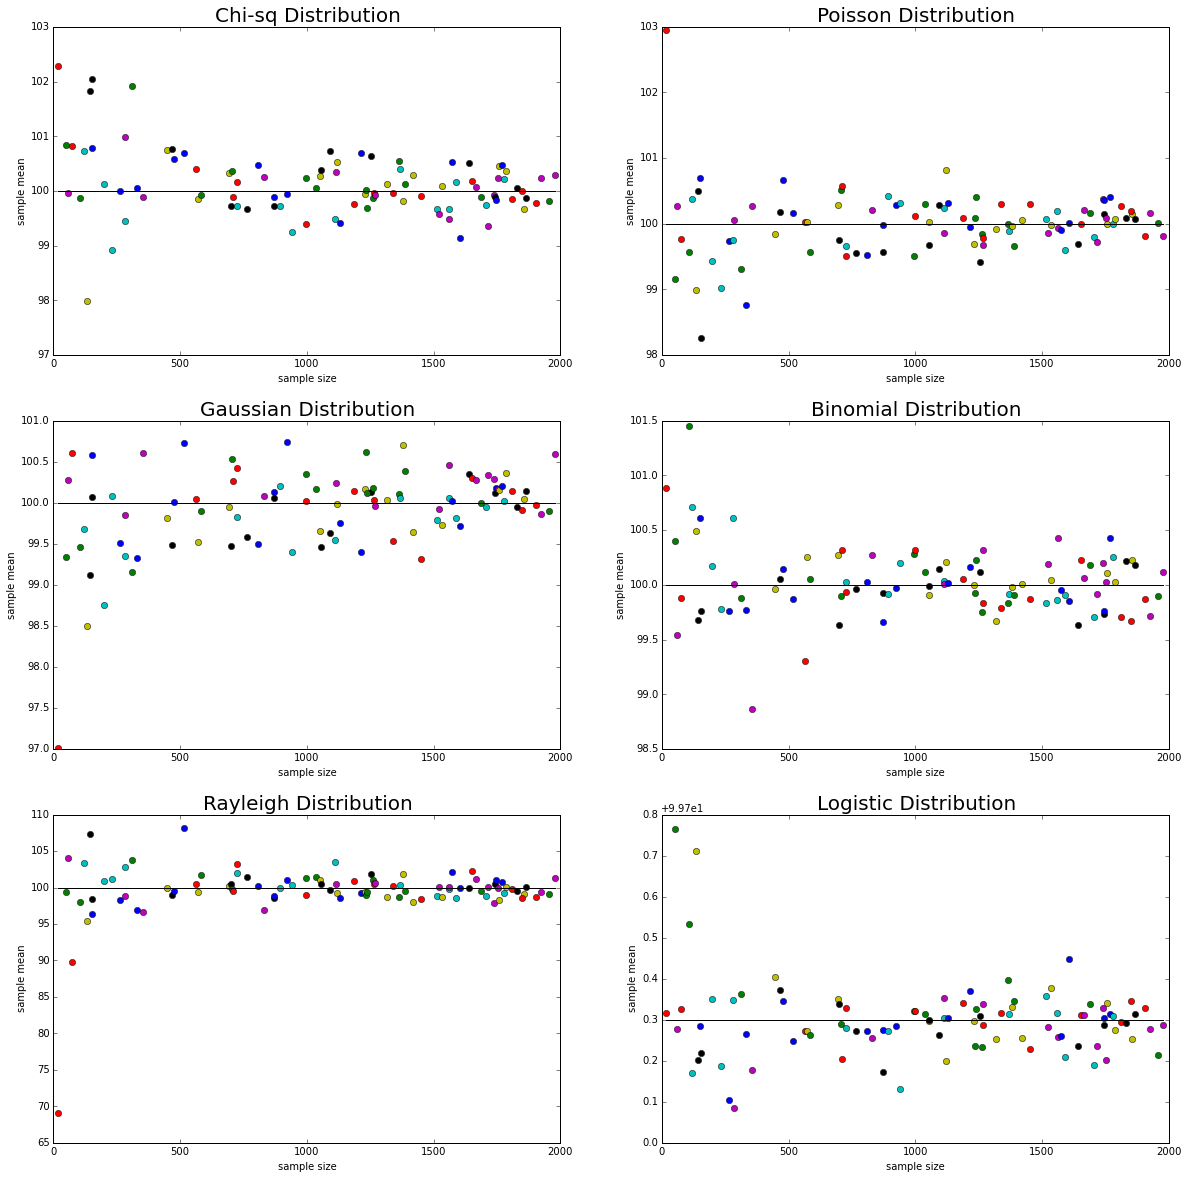

In [8]:
fig = pl.figure(figsize=(20,20))

ax = 321
for i in distributions:
    axm = fig.add_subplot(ax)
    for nn in md[i].iterkeys():
        axm.plot(nn, means[i][nn], 'o')
        axm.set_xlabel('sample size')
        axm.set_ylabel('sample mean')
        axm.set_title('%s Distribution' % (i), fontsize=20)
        axm.plot([min(mysize), max(mysize)],[mymean,mymean], 'k')
    ax += 1

### The larger the sample size, the closer the sample mean value gets to the population mean.

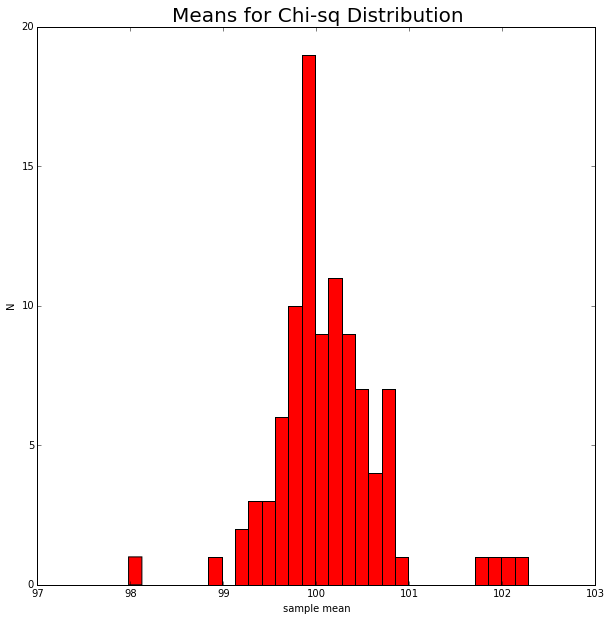

In [9]:
allmeans=[]
for n in means['Chi-sq']:
    allmeans.append(means['Chi-sq'][n])
    
pl.figure(figsize=(10,10))
pl.hist(allmeans,bins=30, color='r')
pl.xlabel('sample mean')
pl.ylabel('N')
pl.title('Means for Chi-sq Distribution', fontsize=20)

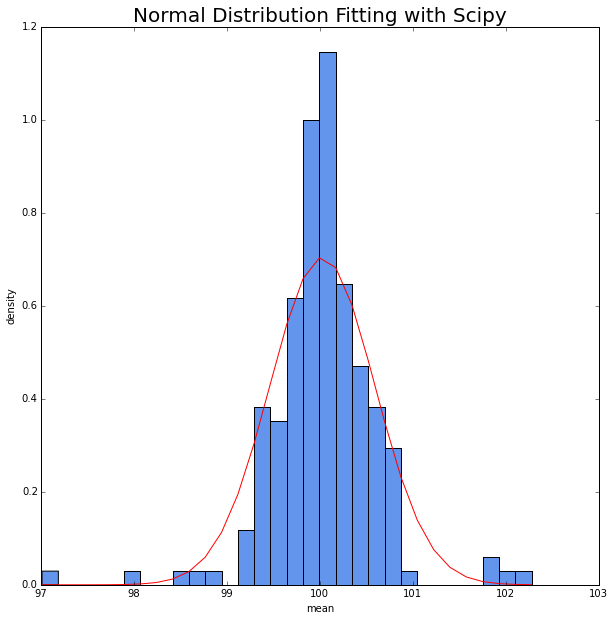

In [10]:
from scipy.stats import norm
#from numpy import linspace
import matplotlib.mlab as mlab

for n in means['Gaussian']:
    allmeans.append(means['Gaussian'][n])
    
(l, s) = norm.fit(allmeans) 
pl.figure(figsize=(10,10))
n, bins, patches = pl.hist(allmeans, normed=1, bins=30, color='#6495ED')
#pdf = norm.pdf(x)  
pdf = mlab.normpdf(bins, l, s)

pl.plot(bins, pdf, 'r')
pl.xlabel('mean')
pl.ylabel('density')
pl.title('Normal Distribution Fitting with Scipy', fontsize=20)


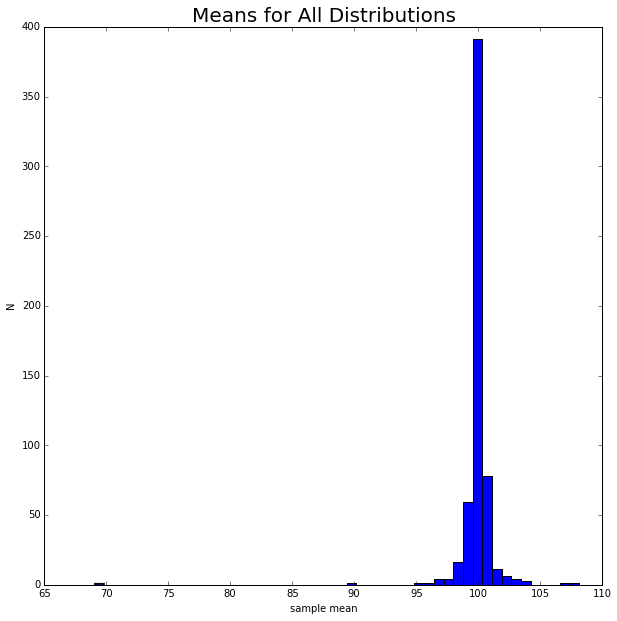

In [11]:
allmeans = []
for nm in means:
    for n2 in means[nm]:
        allmeans.append(means[nm][n2])
    
pl.figure(figsize=(10,10))
pl.hist(allmeans,bins=50)
pl.xlabel('sample mean')
pl.ylabel('N')
pl.title('Means for All Distributions', fontsize=20)